In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime as dt
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score


Bad key savefig.frameon in file /Users/alessandro/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/alessandro/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/alessandro/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
Y

In [2]:
lst = []
for f in os.listdir('/Users/alessandro/Desktop/experience'):
    path = os.path.join('/Users/alessandro/Desktop/experience', f)
    df = pd.read_csv(path)
    df = df.drop(['Unnamed: 0'], axis = 1)
    lst.append(df)
concat_df = pd.concat(lst)
concat_df = concat_df.reset_index(drop=True)

In [3]:
rew = concat_df['reward']
rew2 = concat_df['reward']

In [4]:
rew = rew.to_numpy()
rew2 = rew2.to_numpy()

In [5]:
data = concat_df.drop(['reward'], axis = 1)

In [6]:
X = data.to_numpy()

In [7]:
features = ['t_rem', 'q_rem', 'v_imba1', 'v_imba2', 'v_imba3', 'v_imba4', 'v_imba5', 'v_imba6',
                               'v_imba7', 'v_imba8', 'v_imba9', 'v_imba10', 'p_spread', 'p_ask', 'p_bid', 'p_mid', 'ofi',
                               'p_imba1', 'p_imba2', 'p_imba3', 'p_imba4', 'p_imba5', 'p_imba6', 'p_imba7', 'p_imba8',
                               'p_imba9', 'last_p', 'wp', 'ask_cs1', 'ask_cs2', 'ask_cs3', 'ask_cs4', 'ask_cs5', 'ask_cs6',
                               'ask_cs7', 'ask_cs8', 'ask_cs9', 'ask_cs10', 'bid_cs1', 'bid_cs2', 'bid_cs3', 'bid_cs4',
                               'bid_cs5', 'bid_cs6', 'bid_cs7', 'bid_cs8', 'bid_cs9', 'bid_cs10', 'log_ret', 'action']

features2 = ['t_rem', 'q_rem', 'v_imba1', 'v_imba2', 'v_imba3', 'v_imba4', 'v_imba5', 'v_imba6',
                               'v_imba7', 'v_imba8', 'v_imba9', 'v_imba10', 'p_spread', 'p_ask', 'p_bid', 'p_mid', 'ofi',
                               'p_imba1', 'p_imba2', 'p_imba3', 'p_imba4', 'p_imba5', 'p_imba6', 'p_imba7', 'p_imba8',
                               'p_imba9', 'last_p', 'wp', 'ask_cs1', 'ask_cs2', 'ask_cs3', 'ask_cs4', 'ask_cs5', 'ask_cs6',
                               'ask_cs7', 'ask_cs8', 'ask_cs9', 'ask_cs10', 'bid_cs1', 'bid_cs2', 'bid_cs3', 'bid_cs4',
                               'bid_cs5', 'bid_cs6', 'bid_cs7', 'bid_cs8', 'bid_cs9', 'bid_cs10', 'log_ret', 'action']
features3 = []

In [8]:
# Cross Validation

model1 = ExtraTreesRegressor(n_estimators=100, min_samples_split = 0.001, random_state=0)
scores = cross_val_score(model1, X, rew, cv=6)
print(" Hyperparameter: 0.001 - Cross Validation scores: ")
print(scores)

model2 = ExtraTreesRegressor(n_estimators=100, min_samples_split = 0.005, random_state=0)
scores = cross_val_score(model2, X, rew, cv=6)
print("\n Hyperparameter: 0.005 - Cross Validation scores: ")
print(scores)

model3 = ExtraTreesRegressor(n_estimators=100, min_samples_split = 0.01, random_state=0)
scores = cross_val_score(model3, X, rew, cv=6)
print("\n Hyperparameter: 0.01 - Cross Validation scores: ")
print(scores)

model4 = ExtraTreesRegressor(n_estimators=100, min_samples_split = 0.05, random_state=0)
scores = cross_val_score(model4, X, rew, cv=6)
print("\n Hyperparameter: 0.05 - Cross Validation scores: ")
print(scores)

model5 = ExtraTreesRegressor(n_estimators=100, min_samples_split = 0.1, random_state=0)
scores = cross_val_score(model5, X, rew, cv=6)
print("\n Hyperparameter: 0.1 - Cross Validation scores: ")
print(scores)

 Hyperparameter: 0.001 - Cross Validation scores: 
[0.84632743 0.8408095  0.83334891 0.84590364 0.83256765 0.84857518]

 Hyperparameter: 0.005 - Cross Validation scores: 
[0.84103842 0.83634345 0.82778034 0.8424759  0.82979464 0.84459589]

 Hyperparameter: 0.01 - Cross Validation scores: 
[0.834188   0.83117495 0.8235783  0.83769195 0.82607828 0.83946355]

 Hyperparameter: 0.05 - Cross Validation scores: 
[0.79953294 0.80226457 0.79978413 0.80675605 0.79942008 0.80825888]

 Hyperparameter: 0.1 - Cross Validation scores: 
[0.75765184 0.76477179 0.7634093  0.76702696 0.75764287 0.76950239]


In [9]:
# Build a forest and compute the feature importances

temp = pd.DataFrame()
res_norm = []

for j in range(0,15):
    forest = ExtraTreesRegressor(n_estimators=100, min_samples_split = 0.01, random_state=0)
    forest.fit(X, rew2)

    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("\n Feature ranking:")
    
    for f in range(X.shape[1]):
        print("%d. %s (%f)" % (f + 1, features2[indices[f]], importances[indices[f]]))


    temp[features2[indices[0]]] = data[features2[indices[0]]]
    X_temp = temp.to_numpy()          
    forest.fit(X_temp, rew)
    res = rew - forest.predict(X_temp) 
    res_norm.append(np.linalg.norm(res))
    data = data.drop(features2[indices[0]], axis = 1)
    X = data.to_numpy()
    rew2 = res
    features3.append(features2[indices[0]])
    features2.remove(features2[indices[0]])
            


 Feature ranking:
1. action (0.930487)
2. v_imba1 (0.019254)
3. ask_cs2 (0.007674)
4. ask_cs3 (0.006346)
5. v_imba2 (0.005704)
6. ask_cs1 (0.004969)
7. p_mid (0.004886)
8. ask_cs4 (0.004624)
9. ask_cs5 (0.003475)
10. ask_cs6 (0.001628)
11. ask_cs7 (0.001398)
12. p_imba3 (0.001245)
13. p_imba2 (0.001154)
14. ask_cs8 (0.000780)
15. p_imba1 (0.000606)
16. bid_cs4 (0.000506)
17. bid_cs2 (0.000482)
18. v_imba3 (0.000426)
19. bid_cs1 (0.000420)
20. p_imba4 (0.000385)
21. ask_cs10 (0.000338)
22. ask_cs9 (0.000336)
23. bid_cs7 (0.000335)
24. bid_cs6 (0.000307)
25. bid_cs5 (0.000297)
26. ofi (0.000285)
27. bid_cs3 (0.000254)
28. v_imba10 (0.000214)
29. wp (0.000193)
30. p_imba5 (0.000146)
31. v_imba5 (0.000128)
32. bid_cs9 (0.000095)
33. bid_cs8 (0.000094)
34. p_imba6 (0.000086)
35. v_imba4 (0.000085)
36. q_rem (0.000058)
37. log_ret (0.000046)
38. last_p (0.000043)
39. p_ask (0.000028)
40. v_imba8 (0.000025)
41. v_imba9 (0.000023)
42. v_imba6 (0.000021)
43. t_rem (0.000018)
44. v_imba7 (0.000


 Feature ranking:
1. p_imba1 (0.041954)
2. p_imba2 (0.040875)
3. v_imba10 (0.040516)
4. ask_cs1 (0.038740)
5. ask_cs2 (0.037056)
6. p_imba3 (0.036015)
7. bid_cs4 (0.034175)
8. ask_cs6 (0.033175)
9. ask_cs3 (0.032962)
10. p_imba5 (0.032875)
11. ask_cs5 (0.031450)
12. p_imba8 (0.030801)
13. wp (0.029152)
14. bid_cs3 (0.027550)
15. v_imba4 (0.026606)
16. ask_cs7 (0.026171)
17. v_imba5 (0.025937)
18. log_ret (0.025428)
19. bid_cs6 (0.024586)
20. ofi (0.024354)
21. bid_cs5 (0.024076)
22. ask_cs8 (0.022407)
23. p_imba9 (0.022377)
24. ask_cs10 (0.022123)
25. p_imba6 (0.021922)
26. ask_cs9 (0.020436)
27. p_imba4 (0.019590)
28. p_imba7 (0.019130)
29. last_p (0.018684)
30. bid_cs7 (0.017533)
31. q_rem (0.014900)
32. p_spread (0.014458)
33. v_imba9 (0.013774)
34. v_imba7 (0.013400)
35. t_rem (0.013398)
36. p_ask (0.013235)
37. p_bid (0.012895)
38. bid_cs8 (0.012319)
39. v_imba8 (0.012272)
40. v_imba6 (0.012127)
41. bid_cs10 (0.009520)
42. bid_cs9 (0.009047)

 Feature ranking:
1. p_imba2 (0.04395

In [10]:
forest = ExtraTreesRegressor(n_estimators=100, min_samples_split = 0.01, random_state=0)
forest.fit(X_temp, rew)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

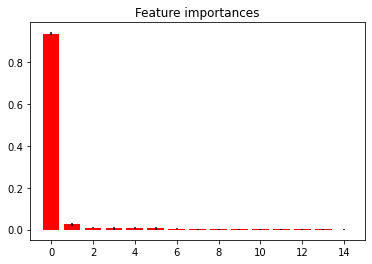

<Figure size 4000x4000 with 0 Axes>

In [11]:
# Plot the feature importances of the forest

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_temp.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X_temp.shape[1]])
plt.figure(figsize=(50, 50), dpi=80)
plt.savefig('Feature importances.png', dpi=80, bbox_inches='tight')
plt.show()

<AxesSubplot:>

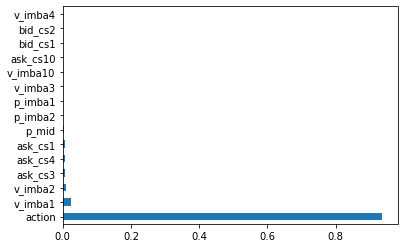

In [12]:
feat_imp = pd.Series(importances, index=features3)
feat_imp.nlargest(15).plot(kind='barh')

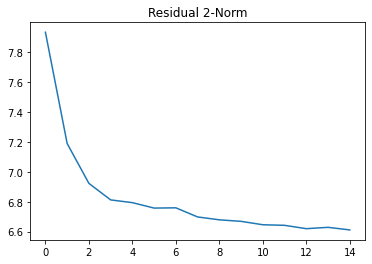

In [13]:
plt.figure()
plt.title("Residual 2-Norm")
plt.plot(res_norm)

In [14]:
r2_score(rew, forest.predict(X_temp))

0.8335975116563681

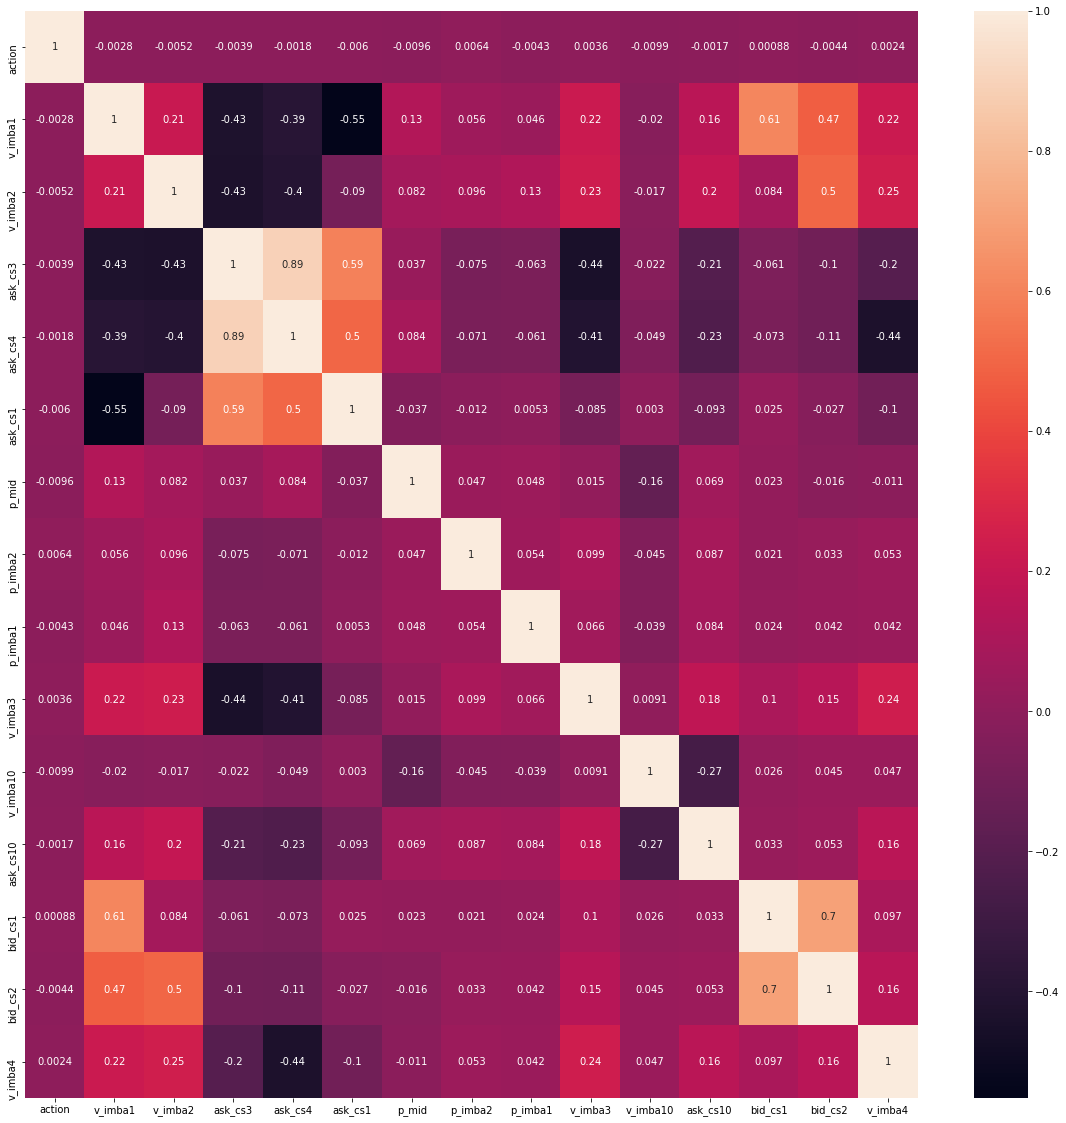

In [15]:
corr_mat = X_temp.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(concat_df[feat_imp.nlargest(10).index].corr(), annot=True)